# Cross Validation

Cross-validation is a technique to evaluate a model by splitting the data into a training and a test set.

The training set is used to train the model, while the test set is used to evaluate the model's performance.

Cross-validation is a statistical technique used in machine learning and data analysis to evaluate how well a model is able to generalize to new data.

In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set).

## Basic Idea

The basic idea is to divide the available data into two parts:

- A **training set**, which is used to train the model.
- A **validation set**, which is used to evaluate the model's performance.

## Types of Cross-Validation

1. **k-fold cross-validation**
2. **Train-test split**
3. **Leave-one-out cross-validation (LOOCV)**
4. **Stratified cross-validation**
5. **Time series cross-validation**
6. **Group cross-validation**

## Example of K-fold Cross-Validation

In **k-fold cross-validation**, the available data is divided into `k` equal parts or "folds". The model is then trained on `k-1` of the folds and validated on the remaining fold. This process is repeated `k` times, with each fold being used once as the validation set. The results from each fold are then averaged to obtain an overall estimate of the model's performance.

## Summary

In summary, cross-validation is a powerful technique for evaluating the performance of machine learning models and can help to ensure that our models are **accurate, reliable, and able to generalize to new data**.


In [2]:
%%time
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

iris = load_iris()
model = GaussianNB()
scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("Score for each fold:",scores)
print("Mean Score:",scores.mean())
print("Standard deviation:",scores.std())

Score for each fold: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean Score: 0.9533333333333334
Standard deviation: 0.02666666666666666
CPU times: user 26.9 ms, sys: 2 µs, total: 26.9 ms
Wall time: 117 ms


# K-fold Cross Validation vs. Train-Test Split

K-fold cross-validation and train-test split are two popular techniques used in machine learning to evaluate the performance of a model. Here are some key differences between the two:

## Data Usage

- **K-fold cross-validation:**  
  The data is split into **k equal parts (folds)**. The model is trained on **k-1 folds** and validated on the remaining fold. This process is repeated **k times**, with each fold being used once as the validation set.

- **Train-test split:**  
  The data is divided into **two parts**: a **training set** and a **testing set**, typically with a ratio of **70-30 or 80-20**. The model is trained on the training set and evaluated on the testing set.

## Data Size

- **K-fold cross-validation:**  
  Suitable for **small datasets**, as it allows better use of the available data.

- **Train-test split:**  
  Typically used for **larger datasets**, as it is faster to implement and may be sufficient for model evaluation.

## Performance Estimation

- **K-fold cross-validation:**  
  Provides a **more accurate estimate** of the model's performance by evaluating it on multiple independent subsets. This helps reduce variance in the performance estimate and detect overfitting.

- **Train-test split:**  
  Provides a **less accurate estimate**, as it depends on the specific subset of data used for testing.

## Computation Time

- **K-fold cross-validation:**  
  **Computationally expensive**, as it requires training and validating the model **k times**.

- **Train-test split:**  
  **Faster to implement**, as the model is trained and validated **only once**.

## Summary

- **K-fold cross-validation** is a **more robust and accurate technique** for evaluating a machine learning model, especially for **small datasets**.  
- **Train-test split** is a **faster and simpler technique**, suitable for **larger datasets** when a quick performance estimate is needed.


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
tips=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
X = tips[['total_bill', 'tip', 'size']]
y = tips['sex']

# Define the Gaussian Naive Bayes model
model = GaussianNB()

In [14]:
scores=cross_val_score(model,X,y,cv=5,scoring='accuracy')
print("Score for each fold:",scores)
print("Mean Score:",scores.mean())
print("Standard deviation:",scores.std())

Score for each fold: [0.55102041 0.55102041 0.59183673 0.65306122 0.54166667]
Mean Score: 0.5777210884353741
Standard deviation: 0.04147568336521195


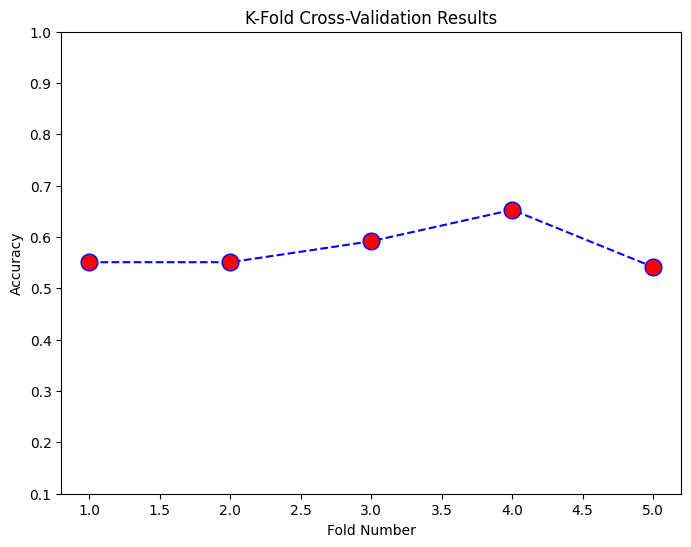

In [16]:
# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(1,6), scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.0])
plt.show()